In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cv2 as cv
from skimage.segmentation import slic

import findatree.io as io
import findatree.visualize as visual
import findatree.segmentation as segment

importlib.reload(segment)

plt.style.use(r"C:\Repos\findatree\own.mplstyle")

In [130]:
s = 30
x  = np.zeros((s,s), dtype=np.float32)
x[0:3*s//4,s//2:s] = 2
x[s//2:s,0:s//2] = 1

x = x + 1
x = x + np.random.rand(s,s) * 0.2
x = x.astype(np.float32)

In [135]:
importlib.reload(segment)

mask = np.ones(x.shape, dtype=np.bool_)
x_grad, x_grad_dir = segment._gradient(x)
x_blur, x_grad, x_edge = segment._canny_edge(x, mask, kernel=3)

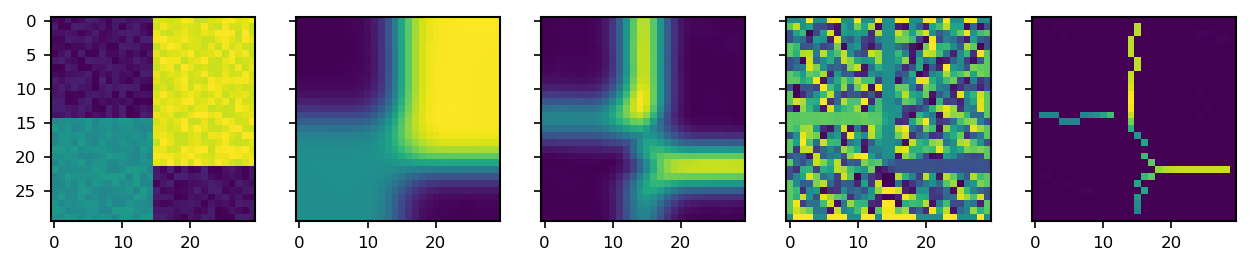

In [136]:
f, axs = plt.subplots(
    figsize=(10,2),
    ncols=5,
    sharex=True,
    sharey=True
)

ax = axs[0]
ax.imshow(x)

ax = axs[1]
ax.imshow(x_blur)

ax = axs[2]
ax.imshow(x_grad)

ax = axs[3]
ax.imshow(x_grad_dir)

ax = axs[4]
ax.imshow(x_edge)